# Partial Report - Braille Text Translator


In [7]:
import numpy as np
import imageio 
import math
import matplotlib.pyplot as plt

In [8]:
# realizando o realce da imagem de forma a deixa-la apenas com as cores preta para os simbolos e branca apra o fundo
def thresholdEnhancement(img, threshold):
    
    imgAux = np.copy(img)

    # computando o histograma da imagem
    hist, bins = np.histogram(img, bins=int(np.max(img)-np.min(img)+1))

    imgAux[np.where(imgAux == np.argmax(hist))] = 255
    imgAux[np.where(imgAux != 255)] = 0

    return imgAux.astype(np.uint8)

# Function for transforming RGB to gray scale
def rgb_to_gray(img):
        grayImage = np.zeros(img.shape)
        R = np.array(img[:, :, 0])
        G = np.array(img[:, :, 1])
        B = np.array(img[:, :, 2])


        Avg = (R * .299 + G * .587 + B * .114) * 255
                
        for i in range(3):
           grayImage[:,:, i] = Avg

        # normalizando a imagem entre 0 e 255
        grayImage = grayImage*255

        return grayImage.astype(np.uint8)

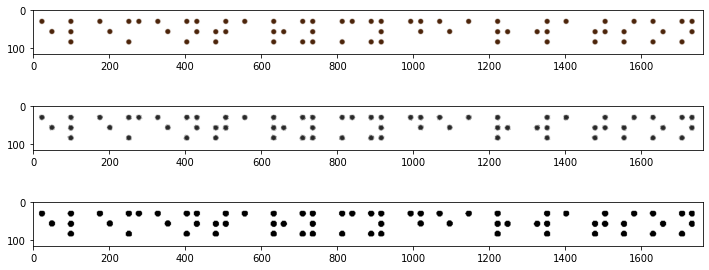

In [9]:
# img = imageio.imread('images/hello_wolrd.png')
# img = imageio.imread('images/colorized.png')
# img = imageio.imread('images/colorized1.png')
# img = imageio.imread('images/colorized2.png')
# img = imageio.imread('images/colorized3.png')

img = imageio.imread('images/Elementary my dear Watson.png')
# img = imageio.imread('images/Houston, we have a problem.png')
# img = imageio.imread('images/My precious.png')
# img = imageio.imread('images/Whoever is happy will make others happy too.png')
# img = imageio.imread('images/Just keep swimming.png')
# img = imageio.imread('images/Carpe diem.png')

grayImg = rgb_to_gray(img[:, :, :3])

threshold = 200
maxContrastImg = thresholdEnhancement(grayImg, threshold)

# mostrando as images original e depois de processada
f, axarr = plt.subplots(3, 1)
f.set_size_inches(12, 5)
axarr[0].imshow(img)
axarr[1].imshow(grayImg)
axarr[2].imshow(maxContrastImg)

plt.show()